Directory Structure

```
    .
    ├── AI20BTECH11006-hw1.ipynb
    └── Images
        ├── 4.1.01.tiff
        ├── 4.1.02.tiff
        ├── 4.1.03.tiff
        ...
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

# Question-1

In [2]:
def CSF(
    size: Tuple[float, float], resolution: Tuple[int, int], available_distance: float
) -> float:
    """
    Contrast Sensitiity Function

    Args:
        size (Tuple[float, float]): Size of the Television in inches
        resolution (Tuple[int, int]): Resolution of the telivision (Example (1920 x 1080))
        available_distance (float): Available distance

    Returns:
        float: the optimal distance in inches

    Raises:
        ValueError: if the required distance is more than the available distance
    """

    pxl_width = min(size[0] / resolution[0], size[1] / resolution[1])
    # 6 cycles -> 12 pixels in 1 degree
    # 6 pxls in 0.5 degree
    tan_half = np.tan(0.5 * np.pi / 180)
    opt_length = 6 * pxl_width / tan_half
    if opt_length > available_distance:
        raise ValueError("Required Length more than available")
    return opt_length


CSF((55, 36), (1920, 1080), 120)

19.694924240975087

# Question-2

### a

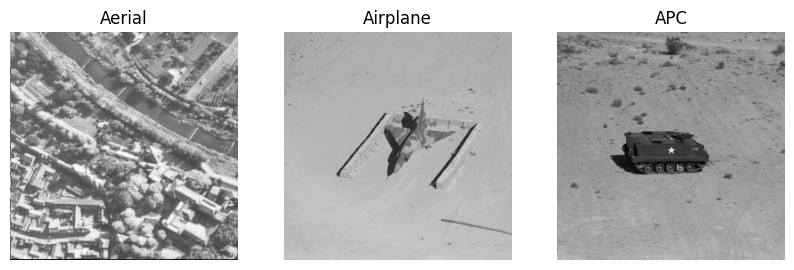

In [3]:
images = {"Aerial": "5.1.10", "Airplane": "7.1.02", "APC": "7.1.08"}

titles, paths = [k for k in images], [images[k] for k in images]

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for idx, (title, path) in enumerate(zip(titles, paths)):
    img = plt.imread(f"Images/{path}.tiff")
    ax[idx].imshow(img, cmap="gray")
    ax[idx].set_title(title)
    ax[idx].axis("off")
plt.show()

### b

In [4]:
for idx, (title, path) in enumerate(zip(titles, paths)):
    img = plt.imread(f"Images/{path}.tiff")
    maximum = np.max(img)
    minimum = np.min(img)
    height, width = img.shape
    bits = np.ceil(np.log2(maximum - minimum + 1e-6))
    print(
        f'{title}\n{"-"*10}\nMax: {maximum}\nMin: {minimum}\nHeight: {height}\nWidth: {width}\nResolution: {width}x{height}\nBits required: {bits}\n'
    )

Aerial
----------
Max: 248
Min: 1
Height: 256
Width: 256
Resolution: 256x256
Bits required: 8.0

Airplane
----------
Max: 250
Min: 3
Height: 512
Width: 512
Resolution: 512x512
Bits required: 8.0

APC
----------
Max: 215
Min: 12
Height: 512
Width: 512
Resolution: 512x512
Bits required: 8.0



In [5]:
import os

for idx, (title, path) in enumerate(zip(titles, paths)):
    print(f"Size of {title} image (in KB) on my disk is: ", end="")
    os.system(f"du -sk Images/{path}.tiff | cut -f1")

Size of Aerial image (in KB) on my disk is: 68
Size of Airplane image (in KB) on my disk is: 260
Size of APC image (in KB) on my disk is: 260


In [6]:
def compression_ratio(path):
    actual_size = os.stat(f"./Images/{path}.tiff").st_size
    img = plt.imread(f"./Images/{path}.tiff")
    uncompressed_size = img.size
    return actual_size / uncompressed_size


for idx, (title, path) in enumerate(zip(titles, paths)):
    print(f"Compression Ratio for {title} is {compression_ratio(path)}")

Compression Ratio for Aerial is 1.002044677734375
Compression Ratio for Airplane is 1.0005111694335938
Compression Ratio for APC is 1.0005111694335938


The ratios are above one because Tiff files are often uncompressed, some data is required to tell the file type, image dimensions etc. This is why the compression ratio is above 1.

It can be confirmed that these files are uncompressed using `exiftool -compression {file_name}`

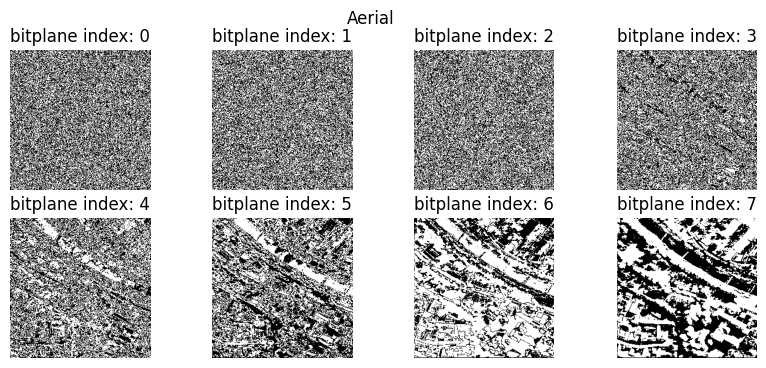

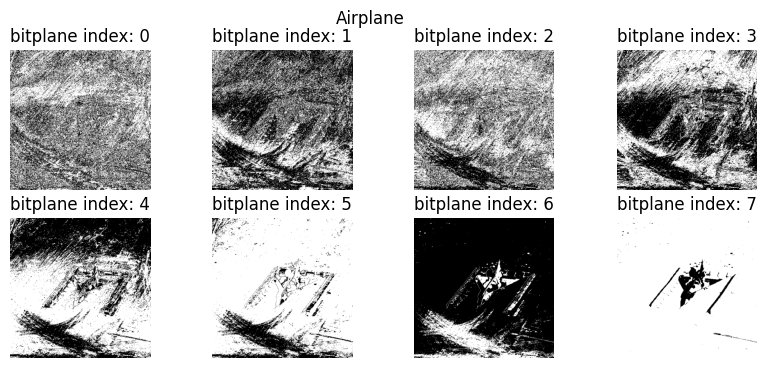

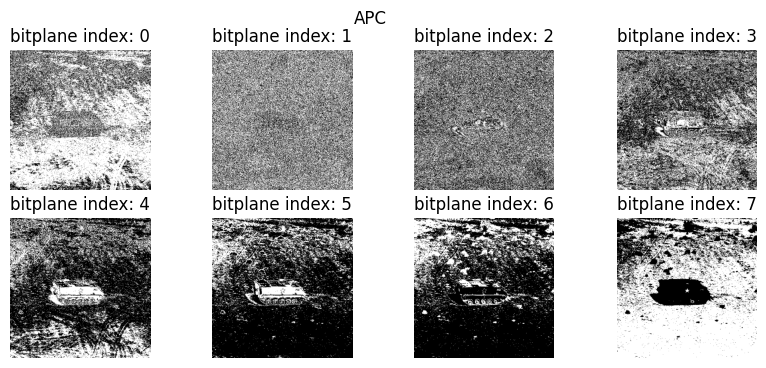

In [7]:
def display_bit_plane(img: np.ndarray, bitplane_index: int):
    img = np.bitwise_and(img, 1 << bitplane_index)
    return img


for idx, (title, path) in enumerate(zip(titles, paths)):
    fig, ax = plt.subplots(2, 4, figsize=(10, 4))
    ax = np.r_[ax[0], ax[1]]  # flattening the subaxis array
    img = plt.imread(f"./Images/{path}.tiff")
    for b in range(8):
        ax[b].imshow(display_bit_plane(img, b), cmap="gray")
        ax[b].set_title(f"bitplane index: {b}")
        ax[b].axis("off")
    fig.suptitle(f"{title}")

# Question-3
### subpart 1

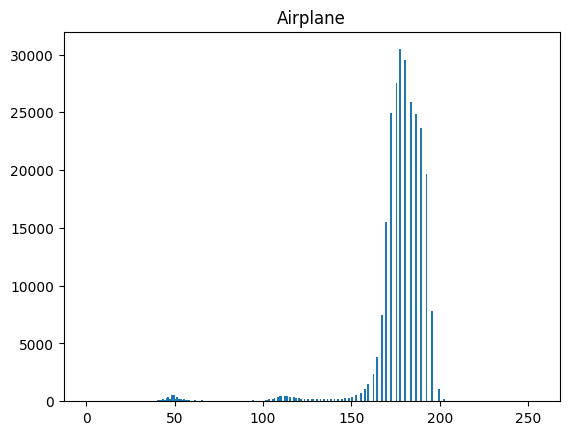

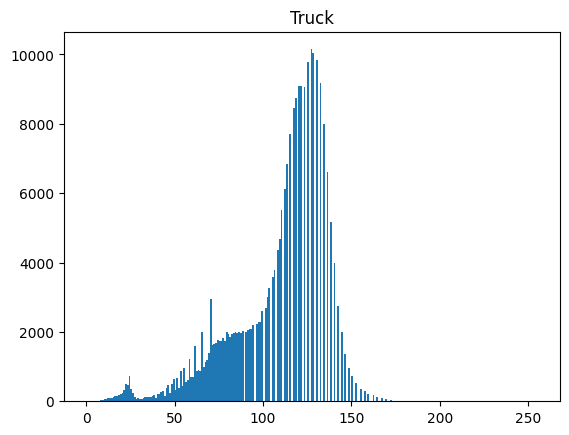

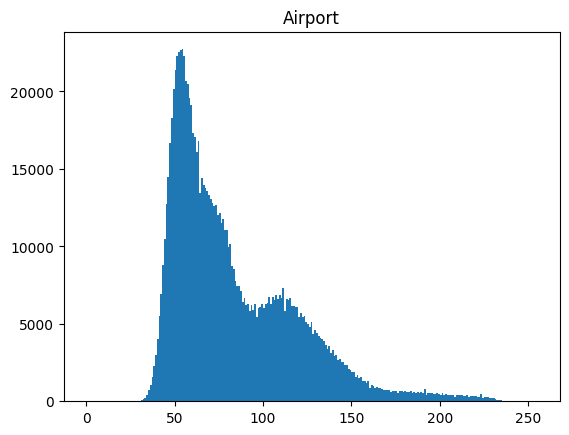

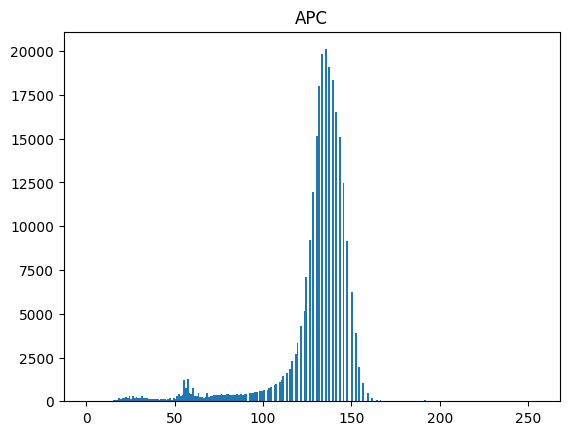

In [8]:
images = {"Airplane": "7.1.02", "Truck": "7.1.01", "Airport": "5.3.02", "APC": "7.1.08"}

titles, paths = [k for k in images], [images[k] for k in images]
images = [plt.imread(f"./Images/{path}.tiff") for path in paths]


def plot_histogram(image, title):
    plt.hist(image.flatten(), bins=np.arange(256))
    plt.title(title)
    plt.show()


for img, title in zip(images, titles):
    plot_histogram(img, title)

The modality of each of the histograms is 1, except for airport where it is 2

### subpart 2

modal thresholding: All the intensity values below the mode are set to 0, rest are set to 1

/tmp/ipykernel_40473/919715703.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  threshold = mode(image.flatten()).mode[0]


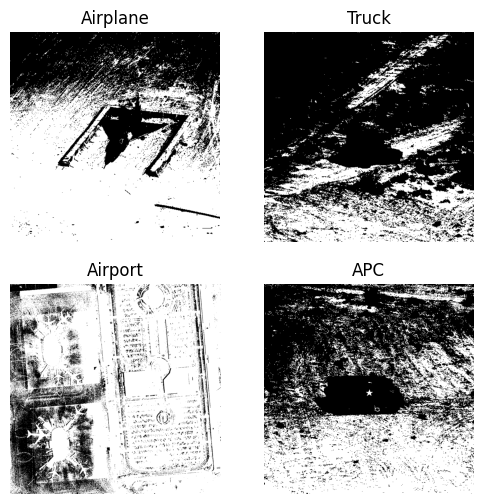

In [9]:
from scipy.stats import mode


def binarise_modal(image):
    threshold = mode(image.flatten()).mode[0]
    image = image.copy()  # won't change the original image
    image[image < threshold] = 0
    image[image >= threshold] = 1
    return image


modal_binarised_images = [binarise_modal(image) for image in images]

fig, ax = plt.subplots(2, 2, figsize=(6, 6))
ax = np.r_[ax[0], ax[1]]  # flattening subaxis array for easy use
for idx, (img, title) in enumerate(zip(modal_binarised_images, titles)):
    ax[idx].imshow(img, cmap="gray")
    ax[idx].axis("off")
    ax[idx].set_title(title)
plt.show()

### subpart 3
#### subsubpart a

/home/cmaspi/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cmaspi/.local/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/cmaspi/.local/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


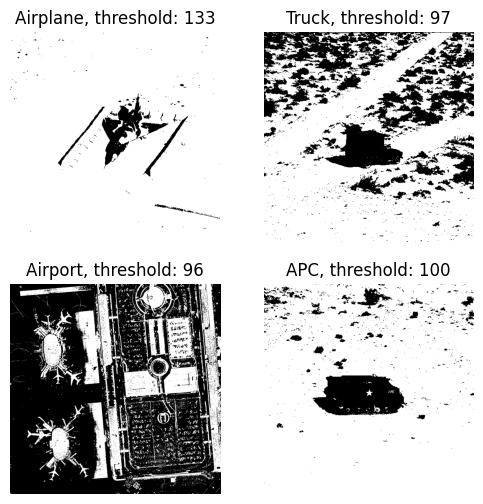

In [10]:
def variance(image, threshold):
    P0 = np.mean(image < threshold)
    P1 = 1 - P0
    sigma_0_sq = np.var(image[image < threshold])
    sigma_1_sq = np.var(image[image >= threshold])
    return P0 * sigma_0_sq + P1 * sigma_1_sq


def find_threshold(image):
    optimal_t, min_var = -1, np.inf
    for t in range(image.min(), image.max() + 1):
        var = variance(image, t)
        if var < min_var:
            min_var = var
            optimal_t = t
    return optimal_t


def otsu_binarization(image):
    threshold = find_threshold(image)
    image = image.copy()  # to not modify the original image
    image[image < threshold] = 0
    image[image >= threshold] = 1
    return image, threshold


otsu_binarised_images = [otsu_binarization(image) for image in images]

fig, ax = plt.subplots(2, 2, figsize=(6, 6))
ax = np.r_[ax[0], ax[1]]  # flattening subaxis array for easy use
for idx, ((img, threshold), title) in enumerate(zip(otsu_binarised_images, titles)):
    ax[idx].imshow(img, cmap="gray")
    ax[idx].axis("off")
    ax[idx].set_title(f"{title}, threshold: {threshold}")
plt.show()

#### subsubpart-b

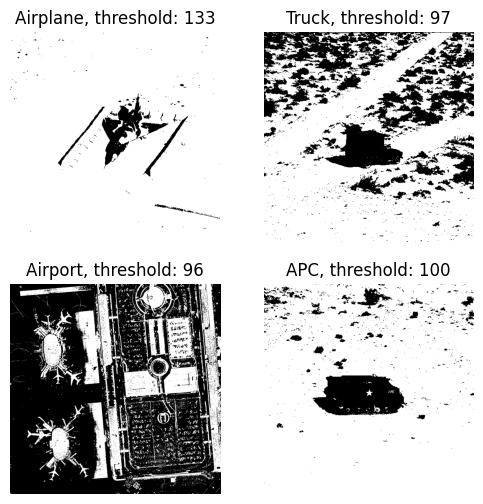

In [11]:
def otsus_algorithm(image):
    intensity_vals, counts = np.unique(image, return_counts=True)
    p = np.zeros(256)
    for i, c in zip(intensity_vals, counts):
        p[i] = c
    p /= image.size

    P0, u0 = p[0], 0
    mu = np.mean(image)

    optimal_t, optimal_var = image.min(), 0

    for t in range(image.min() + 1, image.max() + 1):
        old_P0 = P0
        P0 += p[t - 1]
        u0 = (u0 * old_P0 + (t - 1) * p[t - 1]) / P0
        u1 = (mu - u0 * P0) / (1 - P0)
        sig_b = P0 * (1 - P0) * (u0 - u1) ** 2
        if sig_b > optimal_var:
            optimal_var = sig_b
            optimal_t = t
    image = image.copy()
    image[image < optimal_t] = 0
    image[image >= optimal_t] = 1

    return image, optimal_t


otsu_binarised_images = [otsus_algorithm(image) for image in images]

fig, ax = plt.subplots(2, 2, figsize=(6, 6))
ax = np.r_[ax[0], ax[1]]  # flattening subaxis array for easy use
for idx, ((img, threshold), title) in enumerate(zip(otsu_binarised_images, titles)):
    ax[idx].imshow(img, cmap="gray")
    ax[idx].axis("off")
    ax[idx].set_title(f"{title}, threshold: {threshold}")
plt.show()

### subpart 4

In [12]:
class DSU:
    def __init__(self):
        self.parent = {}
        self.rank = {}

    def initialize_node(self, node):
        self.parent[node] = node
        self.rank[node] = 0

    def find(self, node):
        if self.parent[node] == node:
            return node
        res = self.find(self.parent[node])
        self.parent[node] = res
        return res

    def union(self, node1, node2):
        root1, root2 = self.parent[node1], self.parent[node2]
        if root1 == root2:
            return
        if self.rank[root1] < self.rank[root2]:
            root1, root2 = root2, root1
        self.parent[root2] = root1
        if self.rank[root1] == self.rank[root2]:
            self.rank[root1] += 1

In [13]:
def connected_components(image):
    image = image.copy()
    image[:, 0] = 1
    image[0, :] = 1
    
    R = np.zeros_like(image, dtype=np.int)
    w, h = image.shape[::-1]
    k = 1
    link = set()
    disjoint_set = DSU()
    for i in range(
        1, w
    ):  # starting from 1 because of the assumption that border pixels are background
        for j in range(1, h):
            if image[i, j] == 0:
                if image[i, j - 1] == 1 and image[i - 1, j] == 1:
                    R[i, j] = k
                    disjoint_set.initialize_node(k)
                    k += 1
                elif image[i, j - 1] == 1 and image[i - 1, j] == 0:
                    R[i, j] = R[i - 1, j]
                elif image[i, j - 1] == 0 and image[i - 1, j] == 1:
                    R[i, j] = R[i, j - 1]
                elif image[i, j - 1] == 0 and image[i - 1, j] == 0:
                    R[i, j] = min(R[i, j - 1], R[i - 1, j])
                    if R[i, j - 1] != R[i - 1, j]:
                        link.add((R[i, j], max(R[i - 1, j], R[i, j - 1])))
                        disjoint_set.union(R[i - 1, j], R[i, j - 1])

    for i, j in link:
        i_parent = disjoint_set.find(i)
        j_parent = disjoint_set.find(j)
        if i != i_parent:
            R[R == i] = i_parent
        if j != j_parent:
            R[R == j] = j_parent
    return R

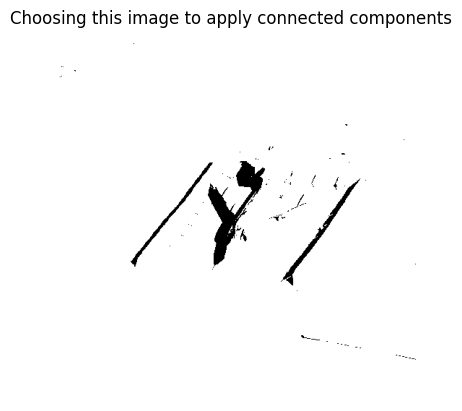

In [14]:
# Choosing an image
airplane = images[0].copy()
airplane[:, 0] = 255
airplane[0, :] = 255

threshold = 100
airplane[airplane < threshold] = 0
airplane[airplane >= threshold] = 1


plt.imshow(airplane, cmap="gray")
plt.axis("off")
plt.title("Choosing this image to apply connected components")
plt.show()

/tmp/ipykernel_40473/3673207951.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R = np.zeros_like(image, dtype=np.int)


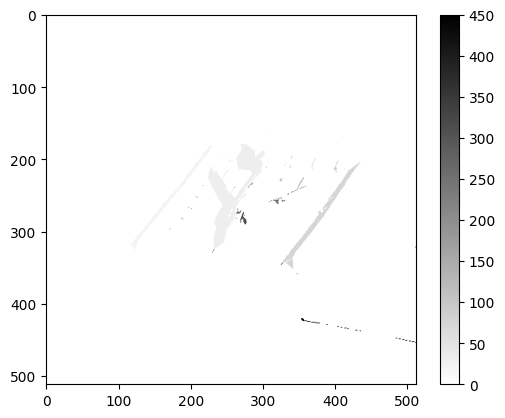

In [15]:
region_map = connected_components(airplane)
plt.imshow(region_map, cmap="gray_r")
plt.colorbar()
plt.show()

Better visualization

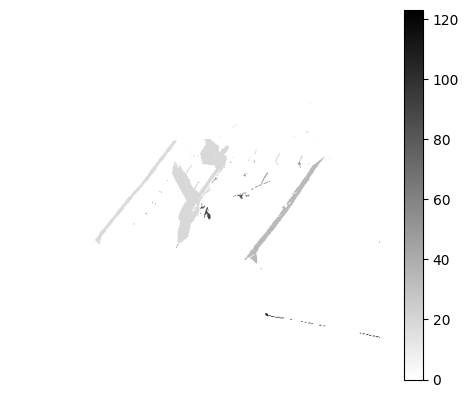

In [16]:
# reducing the maximum region label by mapping region labels
# to 1 ... m

unique = sorted(np.unique(region_map))
for idx, v in enumerate(unique[1:], start=1):
    region_map[region_map == v] = idx
plt.imshow(region_map, cmap="gray_r")
plt.colorbar()
plt.axis("off")
plt.show()

### subpart 5

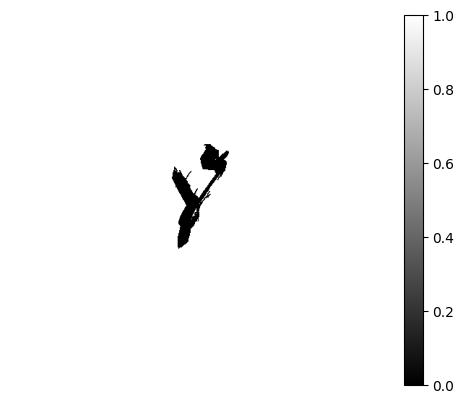

In [17]:
def remove_minor_blobs(region_map):
    unique, counts = np.unique(region_map, return_counts=True)
    counts[np.where(unique == 0)[0][0]] = -1
    region_label = unique[np.argmax(counts)]
    mapping = region_map == region_label
    region_map[mapping] = 0
    region_map[~mapping] = 1
    return region_map


blob_removed = remove_minor_blobs(region_map.copy())
plt.imshow(blob_removed, cmap="gray")
plt.colorbar()
plt.axis("off")
plt.show()

# Question-4
### subpart 1

This convolution function is taken (modified for use case) from **my own** Assignment submitted in the deep learning course: https://github.com/cmaspi/AI2100/blob/main/assignment-3/ai20btech11006-hw3.ipynb

In [18]:
def convolution(img : np.ndarray, kernel : np.ndarray, stride : int = 1) -> np.ndarray:
    """
    Parameters
    ---------
    Returns the convoluted image"""    
    # kernel and image sizes
    kernel_size = kernel.shape
    img_size = img.shape

    # dimensions of image
    W, H = img_size[:2]
    # dimension of kernel
    k = kernel_size[0]
    assert kernel_size[0] == kernel_size[1], "kernel should be a k x k matrix"



    padding = k >> 1
    
    # flipped images
    horizontal_flipped = img[::-1]
    vertical_flipped = img[:,::-1]
    fully_flipped = img[::-1,::-1]

    # creating padded image
    if padding:
        padded_array = np.zeros((W+2*padding, H+2*padding))
        padded_array[padding:-padding,padding:-padding] = img.copy()
        padded_array[:padding,:padding] = fully_flipped[-padding:,-padding:]
        padded_array[-padding:,-padding:] = fully_flipped[:padding,:padding]
        padded_array[:padding,-padding:] = fully_flipped[-padding:,:padding]
        padded_array[-padding:,:padding] = fully_flipped[:padding,-padding:]
        padded_array[:padding,padding:-padding] = horizontal_flipped[-padding:,:]
        padded_array[-padding:,padding:-padding] = horizontal_flipped[:padding,:]
        padded_array[padding:-padding,:padding] = vertical_flipped[:,-padding:]
        padded_array[padding:-padding,-padding:] = vertical_flipped[:,:padding]
    else:
        padded_array = img.copy()
        
    output = np.zeros(( 1+(W+2*padding-k)//stride, 1+(H+2*padding-k)//stride ))
    x,y = 0,0
    for i in range(0, W+1+2*padding-k, stride):
        for j in range(0, H+1+2*padding-k, stride):
            output[x,y] = np.sum(padded_array[i:i+k,j:j+k]*kernel)
            y += 1
            
        x += 1
        y = 0
        
    return output

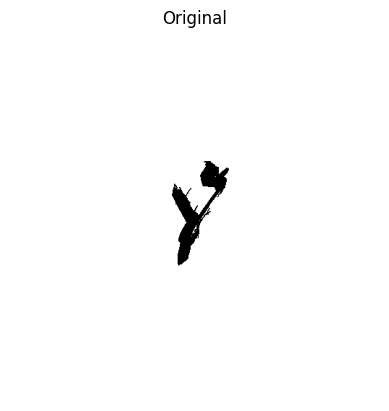

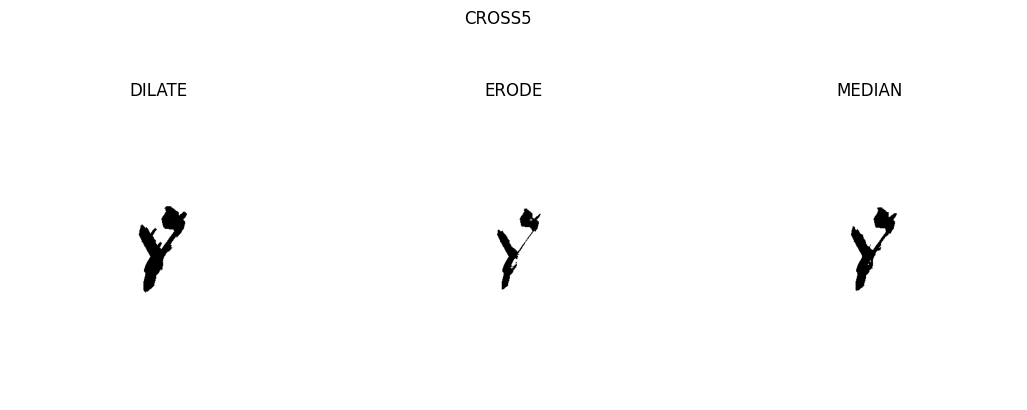

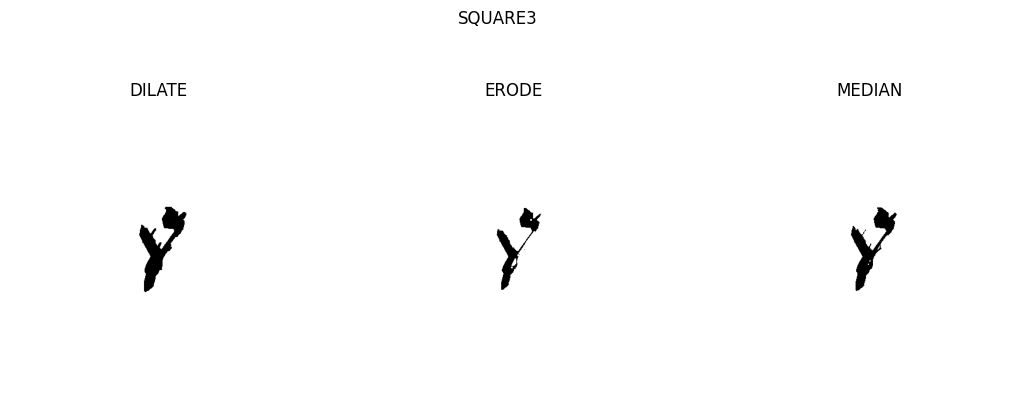

In [19]:
# the main blob should have value 1
image = 1 - blob_removed


class binary_morphology:
    def convolve(self, image, window):
        output = convolution(
            image, window
        )
        mask = output >= 1 - 1e-6 
        output[mask] = 1
        output[~mask] = 0
        return output

    def convert_window_for_operation(self, window, operation: str):
        window = window.copy()
        if operation == "ERODE":
            window /= window.sum()
        if operation == "MEDIAN":
            window /= window.sum() / 2
        return window


cross_5 = np.zeros((5, 5))
cross_5[:, 2] = 1
cross_5[2, :] = 1

square_3 = np.ones((3, 3))

operations = ["DILATE", "ERODE", "MEDIAN"]

# displaying the original

plt.imshow(image, cmap="gray_r")
plt.axis("off")
plt.title("Original")
plt.show()

bm = binary_morphology()

for window_name, window in zip(["CROSS5", "SQUARE3"], [cross_5, square_3]):
    fig, ax = plt.subplots(1, 3, figsize=(13, 5))
    for idx, operation in enumerate(operations):
        window_operation = bm.convert_window_for_operation(window, operation)
        output = bm.convolve(image, window_operation)
        ax[idx].imshow(output, cmap="gray_r")
        ax[idx].set_title(operation)
        ax[idx].axis("off")
    fig.suptitle(window_name)

### subpart 2

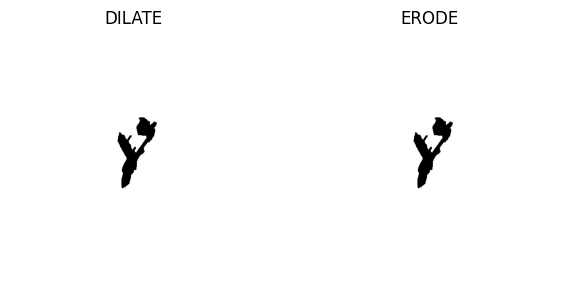

DILATE == ERODE: True


In [20]:
# applying dilate
dilate = bm.convolve(image, bm.convert_window_for_operation(square_3, 'DILATE'))

# inverting
inv_image = 1 - image
# applying erode
erode = bm.convolve(inv_image, bm.convert_window_for_operation(square_3, 'ERODE'))
# inverting erode
erode = 1-erode

fig, ax = plt.subplots(1, 2, figsize=(7, 4))
ax[0].imshow(dilate, cmap='gray_r')
ax[0].set_title('DILATE')
ax[0].axis('off')
ax[1].imshow(erode, cmap='gray_r')
ax[1].set_title('ERODE')
ax[1].axis('off')
plt.show()

print(f'DILATE == ERODE: {(dilate == erode).all()}')



### subpart 3

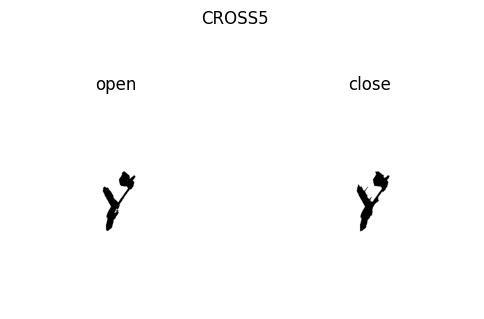

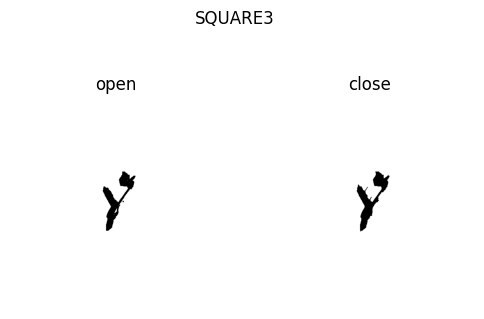

In [21]:
def open(image, window):
    window_erode = bm.convert_window_for_operation(window, 'ERODE')
    window_dilate = bm.convert_window_for_operation(window, 'DILATE')
    return bm.convolve(bm.convolve(image, window_erode), window_dilate)

def close(image, window):
    window_erode = bm.convert_window_for_operation(window, 'ERODE')
    window_dilate = bm.convert_window_for_operation(window, 'DILATE')
    return bm.convolve(bm.convolve(image, window_dilate), window_erode)


for window_name, window in zip(["CROSS5", "SQUARE3"], [cross_5, square_3]):
    fig, ax = plt.subplots(1, 2, figsize=(6, 4))
    for idx, operation in enumerate([open, close]):
        output = operation(image, window)
        ax[idx].imshow(output, cmap="gray_r")
        ax[idx].set_title(operation.__name__)
        ax[idx].axis("off")
    fig.suptitle(window_name)

### subpart 4

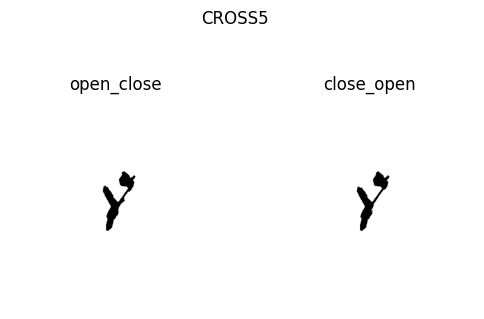

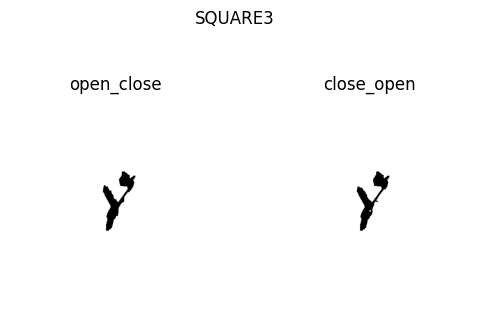

In [22]:
def open_close(image, window):
    return open(close(image, window), window)

def close_open(image, window):
    return close(open(image, window), window)


for window_name, window in zip(["CROSS5", "SQUARE3"], [cross_5, square_3]):
    fig, ax = plt.subplots(1, 2, figsize=(6, 4))
    for idx, operation in enumerate([open_close, close_open]):
        output = operation(image, window)
        ax[idx].imshow(output, cmap="gray_r")
        ax[idx].set_title(operation.__name__)
        ax[idx].axis("off")
    fig.suptitle(window_name)


### subpart 5

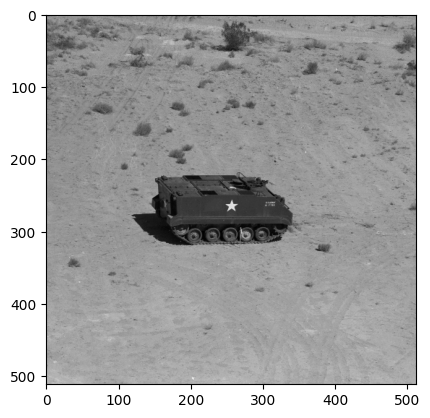

In [23]:
plt.imshow(images[-1], cmap='gray')

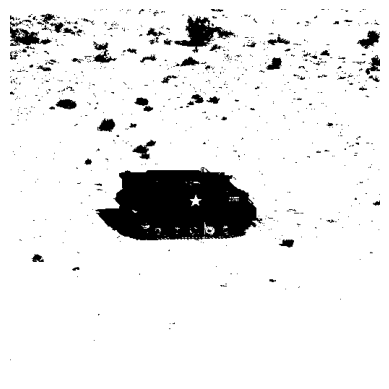

In [24]:
apc = images[-1].copy()
threshold = 100
apc[apc < threshold] = 0
apc[apc >= threshold] = 1

plt.imshow(apc, cmap='gray')
plt.axis('off')
plt.show()

/tmp/ipykernel_40473/3673207951.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R = np.zeros_like(image, dtype=np.int)


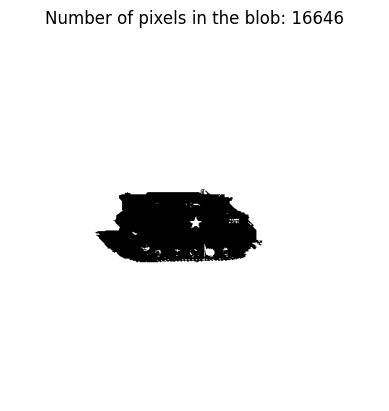

In [25]:
region_map = connected_components(apc)
blob_removed = remove_minor_blobs(region_map)

plt.imshow(blob_removed, cmap='gray')
plt.title(f'Number of pixels in the blob: {blob_removed.size - np.sum(blob_removed)}')
plt.axis('off')
plt.show()